In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.colors import LogNorm
import math

In [2]:
datafile = pd.read_csv("./output/heymap.old.dat", header=None, delim_whitespace=True)
datafile.dropna()

0     1       2
0      -3.00  0.00  10.414
1      -3.00  0.01  10.576
2      -3.00  0.02  11.063
3      -3.00  0.03  15.079
4      -3.00  0.04  25.983
...      ...   ...     ...
179995  2.99  2.95   6.801
179996  2.99  2.96   6.863
179997  2.99  2.97   2.276
179998  2.99  2.98   1.990
179999  2.99  2.99   1.781

[180000 rows x 3 columns]

In [3]:
half_heatmap_1 = datafile.pivot(0,1,2)
half_heatmap_2 = pd.DataFrame(np.flip(half_heatmap_1.values))

In [4]:
ind = half_heatmap_1.index
heatmap = pd.DataFrame(np.concatenate([half_heatmap_2.values,half_heatmap_1.values], axis=1), columns=np.arange(-3.00,3.00,0.01), index=ind)

In [5]:
log_norm = LogNorm(vmin=heatmap.min().min(), vmax=heatmap.max().max())
cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(heatmap.min().min())), 1+math.ceil(math.log10(heatmap.max().max())))]

num_ticks = 7
# the index of the position of yticks
yticks = np.linspace(0, len(heatmap.index)-1, num_ticks, dtype=int)
# the content of labels of these yticks
yticklabels = [heatmap.index[idx] for idx in yticks]

xticks = np.linspace(0, len(heatmap.columns)-1, num_ticks, dtype=int)
# the content of labels of these yticks
xticklabels = [heatmap.columns[idx] for idx in xticks]

In [6]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)



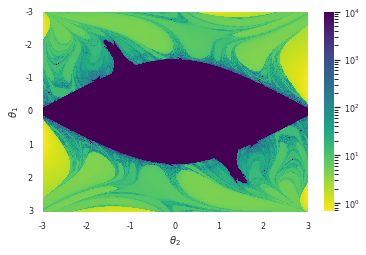

In [7]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "DejaVu sans",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": set_size(429.6368)
}

sn.set(rc=tex_fonts)

a = sn.heatmap(
    heatmap,
    norm=log_norm,
    cmap="viridis_r",
    yticklabels=[-3,-2,-1,0,1,2,3],
    xticklabels=[-3,-2,-1,0,1,2,3],
    cbar_kws={"ticks": cbar_ticks},
    
)

a.set_yticks(yticks)
a.set_xticks(xticks)
a.set_xlabel(r'$\theta_2$')
a.set_ylabel(r'$\theta_1$')
#a.set_title("Tiempo hasta el flip.")
a.set_xticklabels(a.get_xticklabels(), rotation=0)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
fig = a.get_figure()
fig.savefig("./img/p3_heymap.eps", format="eps", bbox_inches='tight')
fig.savefig("./img/p3_heymap.png", format="png", dpi=600, bbox_inches='tight')